# HW8 - 糖尿病預測
#### 【Python人工智慧實戰_2020-06-03】

### Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pima = pd.read_csv('./dataset/pima-indians-diabetes.csv')

# use 'pregnant','insulin','bmi', 'age' to predict 'label'
labels = ['pregnant', 'insulin', 'bmi', 'age', 'label']
df = pima[labels]
print("df shape: {}".format(df.shape))
df.head()

df shape: (768, 5)


,pregnant,insulin,bmi,age,label
0,6,0,33.6,50,1
1,1,0,26.6,31,0
2,8,0,23.3,32,1
3,1,94,28.1,21,0
4,0,168,43.1,33,1


In [3]:
# check missing value
count_missing_val = df.isnull().sum().sum()
print("Number of missing value: {}".format(count_missing_val))

Number of missing value: 0


In [4]:
# separate features and label
X = df.iloc[:, :-1] # collect all columns and all rows except the last column
y = df.iloc[:, -1] # collect only the last column
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (768, 4)
y shape: (768,)


In [5]:
# split data into training data and testing data
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print("x_train shape: {}".format(X_train.shape))
print("x_test shape: {}".format(X_test.shape))

print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (614, 4)
x_test shape: (154, 4)
y_train shape: (614,)
y_test shape: (154,)


In [6]:
# normalize data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
print('X_train: {}'.format(X_train))

X_train: [[-0.24152934 -0.71807607 -1.35714472  1.82612138]
 [ 2.41721789 -0.24049182  0.41977309  1.23838215]
 [ 1.82638517 -0.71807607  0.05688142  0.73460566]
 ...
 [ 0.05388702 -0.71807607 -0.46868582 -0.94464928]
 [ 0.64471974 -0.71807607 -0.54376685  1.32234489]
 [ 1.23555246  1.75828671  0.69507021  1.99404687]]


In [7]:
# use SVM model(rbf kernel) to train
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)
print(model)

# normalize test data 
X_test = scaler.transform(X_test)

# Make predictions using the testing set
y_pred = model.predict(X_test)

SVC(probability=True)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))

number of correct sample: 109
accuracy: 0.7077922077922078
con_matrix: [[93  7]
 [38 16]]


Scatter plot of 13 input X_test values 


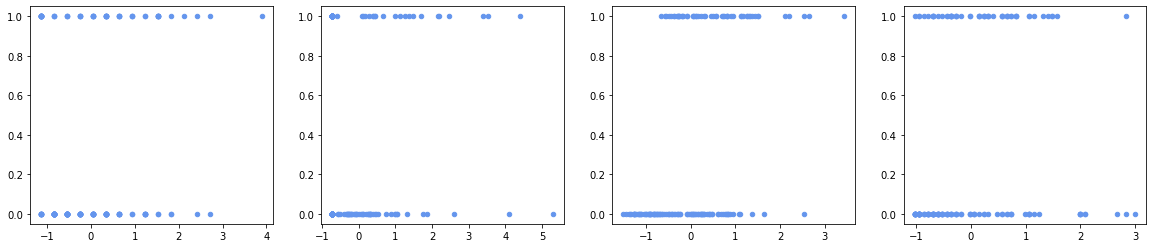

In [9]:
# evaluate result
nrows = 1
ncols = 4

print('Scatter plot of 13 input X_test values ')
plt.figure(figsize=(20, 4))
for i in range(1, 5):
    plt.subplot(nrows, ncols, i)
    X = X_test[:, i-1:i].ravel()
    y = y_test    
    plt.scatter(X, y, color='cornflowerblue', s=20)
plt.show()

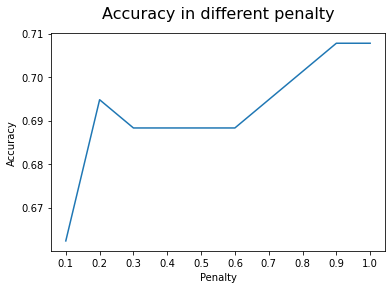

In [10]:
# check different penalty effects
acc = []
for penalty in np.arange(0.1, 1.1, 0.1):
    model = SVC(kernel='rbf', probability=True, C=penalty)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    
plt.plot(np.arange(0.1, 1.1, 0.1), acc)
plt.title('Accuracy in different penalty', size=16, pad=15)
plt.ylabel('Accuracy')
plt.xlabel('Penalty')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.show()